In [100]:
from PIL import Image
from random import randint

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Image Example

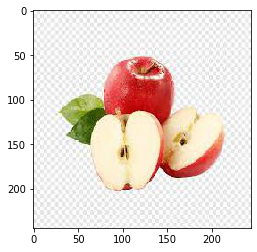

In [17]:
im = Image.open('image_data/apple/apple_001.jpg')

plt.imshow(np.array(im))

### Source images

In [19]:
def source_images(folder_path):
    X_data = []
    y_data = []
    
    for f_name in os.listdir(folder_path):
        if f_name[0] != '.':
            f_path = os.path.join(image_data, f_name)
        
            for img_name in os.listdir(f_path):
                if img_name[0] != '.':
                    img_path = os.path.join(f_path, img_name)
                    im = Image.open(img_path)
                    
                    # Observations
                    X_data.append(np.array(im))
                    # Labels
                    y_data.append(f_name)

    X_data = np.array(X_data)
    y_data = np.array(y_data)
    
    return X_data, y_data

In [4]:
PWD = os.path.abspath(os.curdir)
image_data = os.path.join(PWD, 'image_data')

'/Users/Patryk.Laskowski@ibm.com/Desktop/PATRYK/github/my_repository/IBM_Keras/CNN_MovileNet_v2_02/image_data'

In [46]:
X_data, y_data = source_images(folder_path = image_data)

print(f'X_data shape: {X_data.shape}')
print(f'y_data shape: {y_data.shape}')

X_data shape: (1109, 244, 244, 3)
y_data shape: (1109,)


### Plot the data

In [44]:
def print_images(images, labels, dim=(4, 4)):
    n = dim[0] * dim[1]
    
    assert len(images>=n) and len(images) == len(labels)
    
    indexes = []
    while len(indexes) < n:
        idx = randint(0, len(images))
        if idx not in indexes:
            indexes.append(idx)

    plt.figure(figsize=(10,10))
    
    for i, idx in enumerate(indexes):
        plt.subplot(dim[0], dim[1], i+1)
        plt.subplots_adjust(wspace=0.6)
        plt.imshow(images[idx])
        plt.title(f'{labels[idx]}\nidx: {idx}')
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])

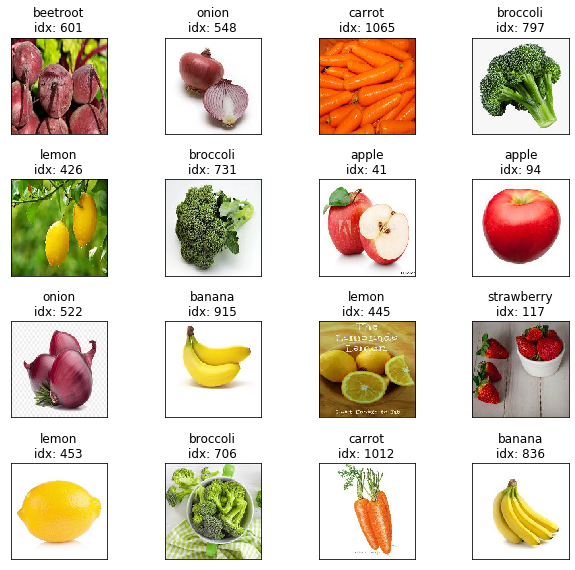

In [47]:
print_images(X_data, y_data)

### Data distribution

In [120]:
def describe(images, labels, num_classes=True):
    n = len(np.unique(labels))
    
    names, counts = np.unique(labels, return_counts=True)
    print('-'*48)
    print(f'| Found {len(images)} observations.')
    print(f'| Found {n} unique classes.')
    
    print('-'*48)
    print('| %3s | %30s | %5s |' % ('IDX', 'LABEL', 'COUNT'))
    print('-'*48)
    for i, name in enumerate(names):
        print('| %3s | %30s | %5s |' % (i+1 , name, counts[i]))
    print('-'*48)
    
    if num_classes:
        return n
    else:
        return True

In [121]:
num_classes = describe(X_data, y_data)

------------------------------------------------
| Found 1109 observations.
| Found 11 unique classes.
------------------------------------------------
| IDX |                          LABEL | COUNT |
------------------------------------------------
|   1 |                          apple |   100 |
|   2 |                        avocado |    71 |
|   3 |                         banana |    97 |
|   4 |                       beetroot |   101 |
|   5 |                    bell_pepper |   111 |
|   6 |                       broccoli |   149 |
|   7 |                         carrot |   109 |
|   8 |                          lemon |    65 |
|   9 |                          onion |    90 |
|  10 |                         orange |    77 |
|  11 |                     strawberry |   139 |
------------------------------------------------


### Preprocess data

In [21]:
# Reshape labels
y_data = y_data.reshape(len(y_data), 1)

print(f'y_data shape: {y_data.shape}')

y_data shape: (1109, 1)


In [22]:
# Normalize observtions
X_data = X_data/255.

In [101]:
# # Encode labels
# le = LabelEncoder()

# le.fit(y_data.squeeze())
# y_data_encoded = le.transform(y_data.squeeze())

# y_data_encoded = y_data_encoded.reshape(len(y_data_encoded), 1)

# print('y_data_encoded:\n')
# for cls, encoded in zip(le.classes_, le.transform(le.classes_)):
#     print('label %3s:  %s' % (encoded, cls))

In [103]:
# OneHot Encode labels
one_hot = pd.get_dummies(pd.Series(y_data.squeeze())) # Dataframe
y_data_one_hot = one_hot.to_numpy() # Numpy array
print('y_data_one_hot shape: %10s' % (str(y_data_one_hot.shape)))

y_data_one_hot shape: (1109, 11)


In [104]:
# Train, test split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data_one_hot, test_size=0.1, random_state=13)

for i, data in enumerate([X_train, X_test, y_train, y_test]):
    name = ['X_train', 'X_test', 'y_train', 'y_test'][i]
    print('| %7s shape: %20s |' % (name, data.shape))

| X_train shape:   (998, 244, 244, 3) |
|  X_test shape:   (111, 244, 244, 3) |
| y_train shape:            (998, 11) |
|  y_test shape:            (111, 11) |


---

In [124]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(244, 244, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [125]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [111]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [112]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 242, 242, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 121, 121, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 119, 119, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 59, 59, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 57, 57, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 128)      

In [126]:
EPOCHS = 5

hist = model.fit(x=X_data,
                    y=y_data_one_hot,
                    epochs=EPOCHS,
                    batch_size=10,
                    validation_split=0.1)

Train on 998 samples, validate on 111 samples
Epoch 1/5
998/998 [==============================] - 83s 84ms/sample - loss: 13.7321 - accuracy: 0.1423 - val_loss: 3.1430 - val_accuracy: 0.0000e+00
Epoch 2/5
998/998 [==============================] - 88s 88ms/sample - loss: 2.2827 - accuracy: 0.1453 - val_loss: 5.0520 - val_accuracy: 0.0000e+00
Epoch 3/5
998/998 [==============================] - 109s 109ms/sample - loss: 2.2354 - accuracy: 0.1693 - val_loss: 7.0615 - val_accuracy: 0.0000e+00
Epoch 4/5
998/998 [==============================] - 93s 93ms/sample - loss: 2.2080 - accuracy: 0.1784 - val_loss: 7.5939 - val_accuracy: 0.0000e+00
Epoch 5/5
998/998 [==============================] - 82s 82ms/sample - loss: 2.1649 - accuracy: 0.1954 - val_loss: 9.6040 - val_accuracy: 0.0000e+00


### MobileNet_v2

In [80]:
import tensorflow as tf
import tensorflow_hub as hub

In [85]:
m = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4",
                   trainable=False),  # Can be True, see below.
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
m.build([None, 224, 224, 3])  # Batch input shape.

In [87]:
m.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   multiple                  4363712   
_________________________________________________________________
dense_1 (Dense)              multiple                  1793      
Total params: 4,365,505
Trainable params: 1,793
Non-trainable params: 4,363,712
_________________________________________________________________


In [89]:
EPOCHS = 5

In [150]:
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/3"


feature_extractor = hub.KerasLayer(URL,
                                   input_shape=(224, 224,3))

# Do not want to change pre trained models weights
feature_extractor.trainable = False

In [151]:
transferedModel = tf.keras.Sequential([
    feature_extractor,
    layers.Dense(units=classes_num,
                 activation='softmax'),
])

transferedModel.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_7 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense_14 (Dense)             (None, 11)                14091     
Total params: 2,272,075
Trainable params: 14,091
Non-trainable params: 2,257,984
_________________________________________________________________


In [152]:
transferedModel.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [153]:
history = transferedModel.fit(x=X_data,
                              y=y_data_encoded,
                              epochs=EPOCHS,
                              validation_split=0.2,
                              verbose=1)

ValueError: Error when checking input: expected keras_layer_7_input to have shape (224, 224, 3) but got array with shape (244, 244, 3)

In [145]:
m = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/3",
                   output_shape=[1280],
                   input_shape=(224, 224,3),
                   trainable=False),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
# m.build([None, 224, 224, 3])  # Batch input shape.

In [146]:
m.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_6 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense_13 (Dense)             (None, 11)                14091     
Total params: 2,272,075
Trainable params: 14,091
Non-trainable params: 2,257,984
_________________________________________________________________


In [147]:
m.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [148]:
history = m.fit(x=X_data,
                y=y_data_encoded,
                epochs=EPOCHS,
                validation_split=0.1,
                verbose=1)

ValueError: Error when checking input: expected keras_layer_6_input to have shape (224, 224, 3) but got array with shape (244, 244, 3)